# **ANÁLISE EXPLORATÓRIA NA  BASE DE DADOS RISK CREDIT**

Este trabalho tem como objetivo atender fazer uma análise de dados de exploratória na base de dados de risco de crédito que pode ser encontrada no site Kaggle. 

## **SOBRE OS DADOS**

A ideia básica deste dataset é simular dados obtidos pela Bureau Data que é uma agência de crédito ou uma agência geradora de relatórios de crédito que coleta e armazena informações sobre a saúde financeira das pessoas em relação a suas finanças. 

Estes relatórios, servem de subsídio para instituições financeiras avaliarem a possibilidade de fornecimento ou não de empréstimos ou financiamentos para seus clientes. 


---

### **Descrição das Colunas contidas no Dataset**

- **person_age** - Idade do cliente
- **person_income** - Renda anual do cliente
- **personhomeownership** - Bens pessoais
- **personemplength** - Tempo de trabalho
- **loan_intent** - Intenção de Empréstimo
- **loan_grade** - Grau de empréstimo
- **loanintrate** - Taxa de Juros
- **loan_status** - Status do empréstimo (0 não é padrão 1 é padrão). Se a pesseo pagou ou não
- **loanpercentincome** - Percentual da renda comprometida com o emprestimo
- **cbpersondefaultonfile** - Padrão histórico
- **cbpresoncredhistlength** - Tamanho do histórico de cŕedito


---

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings
warnings.filterwarnings('ignore')

## **1.IMPORTANDO OS DADOS**

### **1.1.Análise inicial dos dados**

A ideia central nesta primeira verificação dos dados é conhecer de forma bastante generalizada a base e verificar se foi importada de forma correta. 

Para isso, utilizo os métodos e Tail, Head para verificar tantos os primeiros cinco registros da base, quando os cinco últimos

Depois passo para os métodos shape,  info e isnull para verificar o tamanho do Data Frame, o Schema dos dados e por último a quantidade de dados nulos ou faltantes. 

De cara já conseguimos identificar que a base possui dados faltantes.


In [69]:
# Importando os dados
df = pd.read_csv('credit_risk_dataset.csv')

In [70]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [71]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [72]:
df.shape

(32581, 12)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [74]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

---

### **1.2.Verificando a distribuição dos Dados**

Esta abordagem de gerar os BoxPlots e os gráficos de densidade nos dá uma boa visão geral de como os dados estão distribuídos na base e também contribuem para identificar de forma muito rápida dados em formato “supeito”.

Olhando para o gŕafico da idade (Age) pode-se observar que existem registros de pessoas com 140 anos por exemplo, algo que é no mínimo estranho. Os outros campos também possuem vários registros de valores muito fora da base. 

Estes registros podem estar contribuindo para que a densidade dos dados não fique tão bem distribuída.

De posse destas informações. O ideal é verificar todos os registros, mas para isso irei criar uma função que retornará exatamente os dados que quero verificar. 


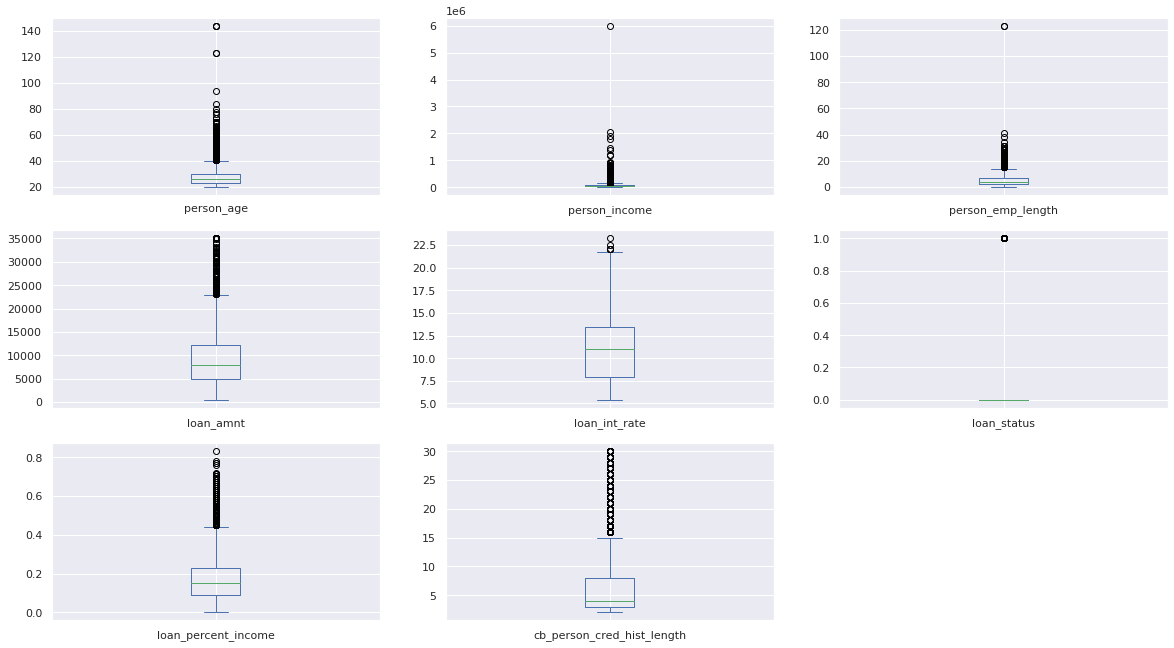

In [75]:
df.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15));

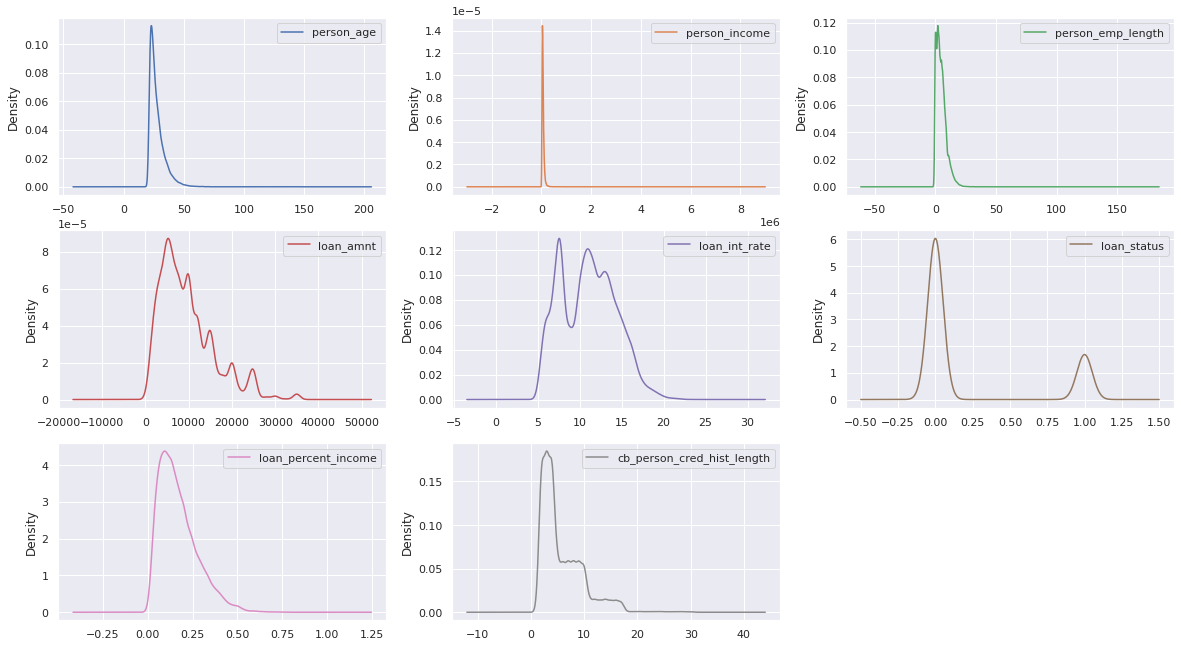

In [76]:
df.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15));

---

## **2.Dados Numéricos - Outliers**

Já sabemos que a base possui muitos dados outliers, ou seja, dados que aparentemente estão completamente fora do contexto. O campo idade por exemplo tem pessoas com mais de 100 e o tempo de trabalho, possui registro com 123 anos de experiencia.

Isso nem sempre é sinônimo de erro, muitas vezes podem existir dados que realmente estão bastante fora da média por conta de características muito particulares.

Por isso, nesta etapa do projeto é sempre bom trabalhar ao lado de um especialista na área para que este tipo de informação seja validado. 

Para este projeto, vou adotar uma abordagem mais prática, onde irei fazer a remoção dos outliers de forma matemática. Para tal, irei criar uma função que fará a remoção destes dados de forma automática. 

In [185]:
# Describe é um execelente método para verificar variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [181]:
df2 = df.copy()

In [183]:
# Função para remoção dos outliers
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [184]:
df2 = outlier(df2)

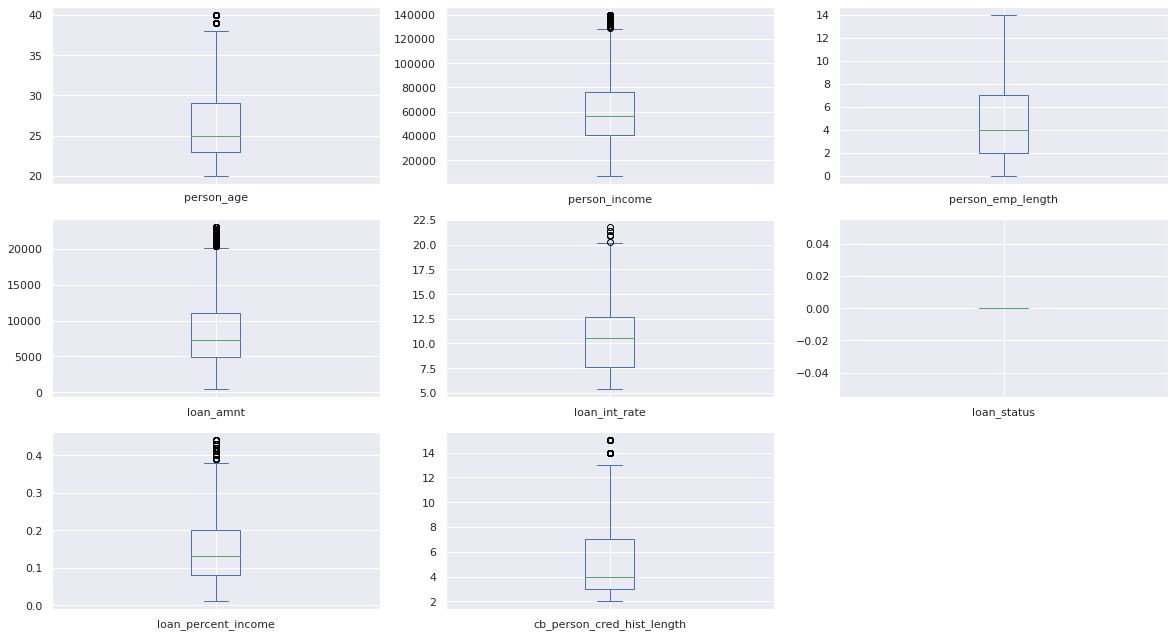

In [208]:
# Verificando os dados após a remoção dos outliers
df2.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15));

In [209]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,21410.0,26.437926,4.216811,20.00,23.00,25.00,29.00,40.00
person_income,21410.0,61165.891733,26517.358721,7000.00,40800.00,56400.00,76000.00,140004.00
person_emp_length,20856.0,4.509446,3.392364,0.00,2.00,4.00,7.00,14.00
loan_amnt,21410.0,8258.408454,4720.880462,500.00,4856.25,7350.00,11000.00,23000.00
loan_int_rate,19349.0,10.371261,2.959595,5.42,7.66,10.59,12.69,21.74
loan_status,21410.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
loan_percent_income,21410.0,0.146430,0.079839,0.01,0.08,0.13,0.20,0.44
cb_person_cred_hist_length,21410.0,5.028631,2.976573,2.00,3.00,4.00,7.00,15.00


---

## **3.Verificando os dados forma individual**

Neste ponto a idea é conhecer um pouco melhor os dados para na sequencia levantar algumas hipóteses jogando "X" contra "Y", ou feature contra feature.

Vale ressaltar que gosto de fazer isso antes do tratamento dos dados faltantes para que eu consiga identificar a melhor forma de tratá-los.

Conforme o coeficiente de variação dos dados, pode ser melhor aplicar uma média para preencher os dados faltantes ou uma mediana. 

Veja que na célula abaixo criei duas listas. A primeira chamada stringData armazena apenas as colunas que possuem dados categóricos. Na segunda lista chamada numericData estão armazenadas as variáveis quantitativas.

É importante termos noção desta diferença entre os tipos de dados porque a forma de abordagem de cada um é diferente. No primeiro tipo nós conseguimos analisar frequências e por consequência as porcentagens.

Já no tipo de dados quantitativos, podemos trabalhar com todas as medidas de centralidade e operadores matemáticos. 


In [205]:
# Criando uma função para verificar os dados
stringData = df2.select_dtypes('object').columns # Armazenando nome das colunas que possuem dados Categóricos
numericData = df2.select_dtypes('number').columns # Armazenando nome das colunas que possuem dados Quantitativos

def categoricos(x):
    percent = df2[x].value_counts(normalize= True)
    quant = df2[x].value_counts()
    faltantes = df2[x].isnull().sum()

    dfTempo = pd.DataFrame({
        'Itens':percent.index, 
        'Quantidade':quant.values,
        'Percentual': percent.values *100,
        'Faltantes': faltantes
    })

    print(f'Dados da variável {x}')
    display(round(dfTempo, 2))

    imagem = sns.barplot(data = dfTempo, y= 'Quantidade', x = 'Itens')
    imagem.figure.set_size_inches(15,5)
    imagem.set_title(x.upper(), fontsize = 30)
    
    for i in imagem.patches:
        imagem.annotate(i.get_height(),
                    (i.get_x() + i.get_width() / 2, i.get_height()),
                    ha='center',
                    va='baseline',
                    fontsize=14,
                    color='black',
                    xytext=(0, 1),
                    textcoords='offset points')
        

### **3.1.Pessoas com casa Própria**

Podemos observar que a maior parte das pessoas não possui casa própria. Existe uma grande quantidade de imóveis alugados e hipotecados. Apenas uma pequena quantidade de pessoas possui casa própria. 

Dados da variável person_home_ownership


,Itens,Quantidade,Percentual,Faltantes
0,RENT,10073,47.05,0
1,MORTGAGE,9308,43.48,0
2,OWN,1969,9.20,0
3,OTHER,60,0.28,0


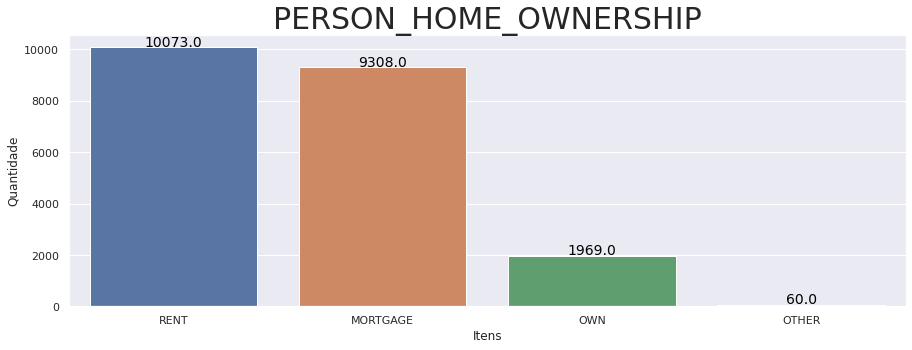

In [206]:
categoricos('person_home_ownership')

### **3.2.Motivo do Empréstimo**

Os principais motivadores para solicitações de empréstimos são educação e médico.

Dados da variável loan_intent


,Itens,Quantidade,Percentual,Faltantes
0,EDUCATION,4656,21.75,0
1,VENTURE,4091,19.11,0
2,MEDICAL,3794,17.72,0
3,PERSONAL,3620,16.91,0
4,DEBTCONSOLIDATION,3154,14.73,0
5,HOMEIMPROVEMENT,2095,9.79,0


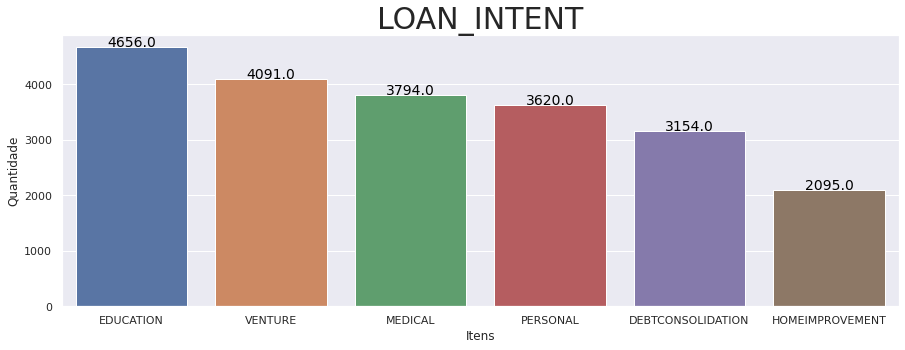

In [207]:
categoricos('loan_intent')

### **3.3.Classificação de Crédito**

A imensa maioria das pessoas da base de dados possui uma boa classificação de crédito. Note que a maioria tem classificação A.

Dados da variável loan_grade


,Itens,Quantidade,Percentual,Faltantes
0,A,8358,39.04,0
1,B,7217,33.71,0
2,C,4394,20.52,0
3,D,1146,5.35,0
4,E,256,1.20,0
5,F,38,0.18,0
6,G,1,0.00,0


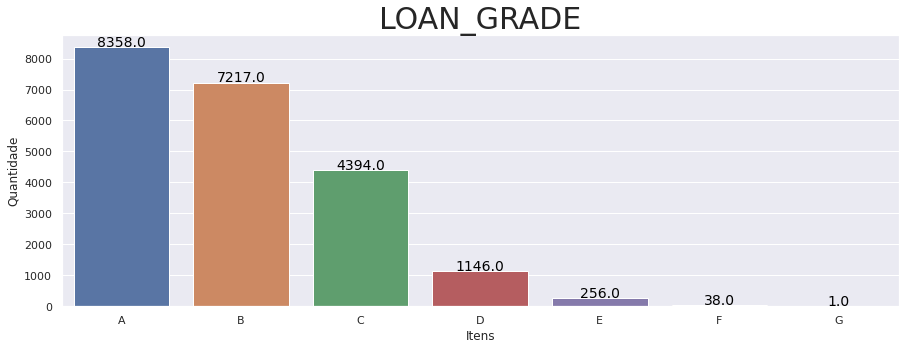

In [195]:
categoricos('loan_grade')

### **3.4.Pessoas que pagam seus Empréstimos**

A quantidade de pessoas que pagam seus empréstimos é a grande maioria da base, o que vai diretamente ao encontro da informação de classificação de crédito. 

Dados da variável cb_person_default_on_file


,Itens,Quantidade,Percentual,Faltantes
0,N,18444,86.15,0
1,Y,2966,13.85,0


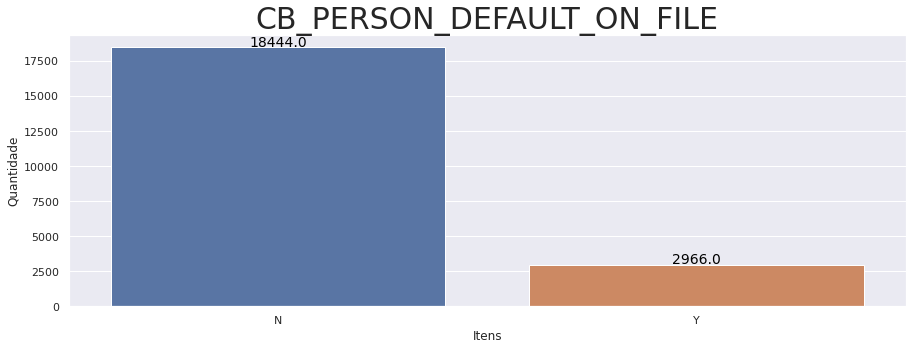

In [196]:
categoricos('cb_person_default_on_file')

---